# 20220125 Initial Analysis

In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

## Edit Me
from imaka.reduce.nights import reduce_2022_01_25 as redu
night = '20220125'
fld = 'Beehive-W'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import warnings
warnings.filterwarnings('ignore')

## Reduction inputs

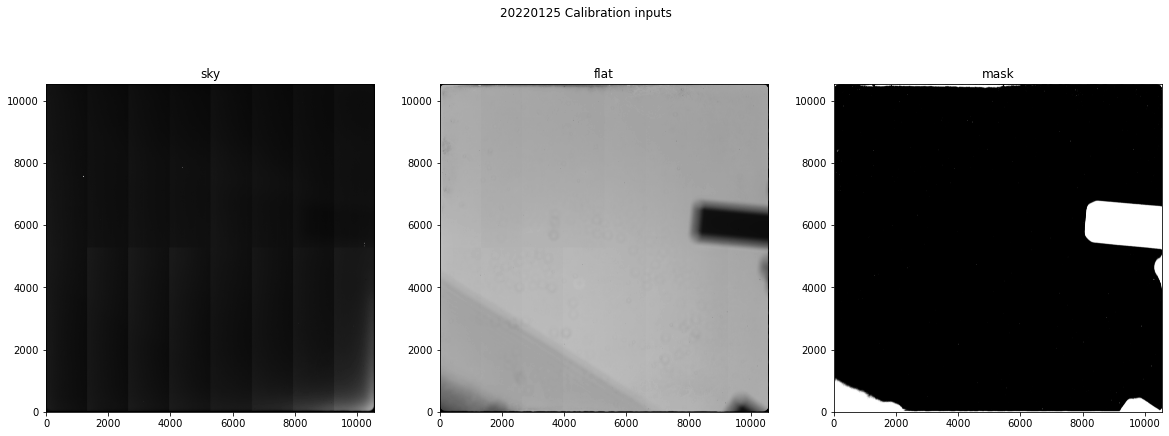

In [41]:
## sky, flats, and mask
sky_f = redu.sky_dir + "beehive_sky.fits"
flat_f = redu.calib_dir + "domeflat.fits"
mask_f = redu.calib_dir + "domemask.fits"

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7))
fig.suptitle(night + ' Calibration inputs')

ax0.set_title('sky')
image_data = fits.getdata(sky_f)
ax0.imshow(image_data, cmap='gray', vmin=0, vmax=1000, origin='lower')

ax1.set_title('flat')
image_data = fits.getdata(flat_f)
ax1.imshow(image_data, cmap='gray', vmin=0, vmax=1.5, origin='lower')

ax2.set_title('mask')
image_data = fits.getdata(mask_f)
ax2.imshow(image_data, cmap='gray', vmin=0, vmax=1, origin='lower')

plt.show()

## Real time plots

In [15]:
# Enter chosen file
test_img_base = 'sta009n3wfs_c_scan' # this is the test single code

In [42]:
# pick a file based on key
key = 'open' #'LS_5wfs' # 
i=6

img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 1.100"


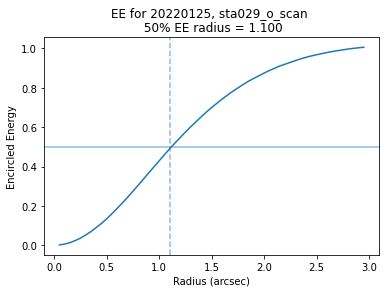

In [43]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

Play with a star list and look at trends in FWHM, etc. 

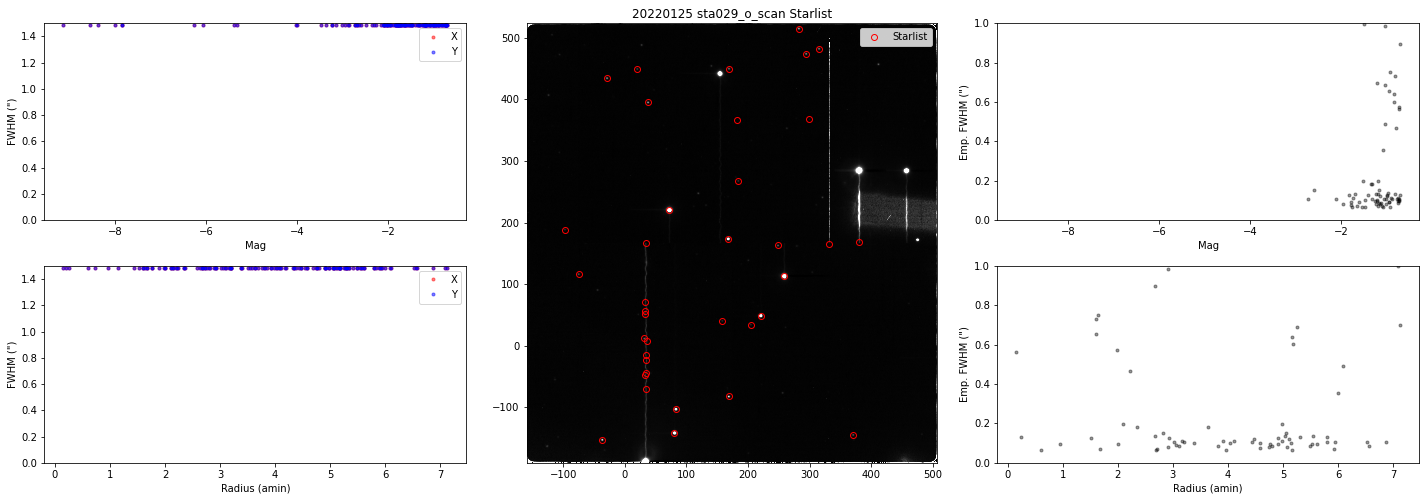

x: fwhm_x_avg = 1.48" fwhm_x_med = 1.48" fwhm_x_std = 0.00"
x: fwhm_x_avg = 1.48" fwhm_x_med = 1.48" fwhm_x_std = 0.00"


In [44]:
plot_redu.plot_starlist_stats(test_img_base, root_dir, fld, night)

## Night-Long Stats

In [45]:
stats = Table.read(root_dir + 'reduce/stats/stats_LS_3wfs_s.fits')

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std']


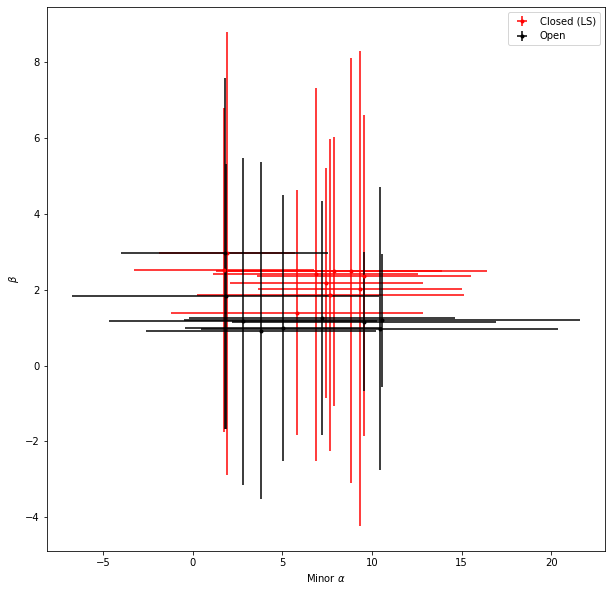

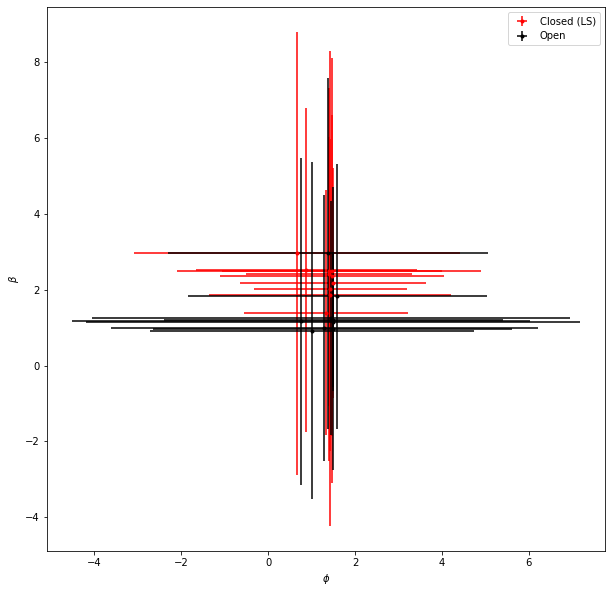

In [46]:
# stats by star 
stats_c = Table.read(root_dir + 'reduce/stats/stats_LS_5wfs.fits')
stats_o = Table.read(root_dir + 'reduce/stats/stats_open.fits')

# stats by stack? => doesn't work
#stats_c = Table.read(root_dir + 'reduce/stacks/fld2_stack_LS_c_stars_stats_mdp.fits')
#stats_o = Table.read(root_dir + 'reduce/stacks/fld2_stack__o_stars_stats.fits')

print(stats.colnames)

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Minor Alpha'], stats_c['Beta'], xerr=stats_c['Minor Alpha std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Minor Alpha'], stats_o['Beta'], xerr=stats_o['Minor Alpha std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'Minor $\alpha$')
plt.ylabel(r'$\beta$')
plt.legend()

plt.figure(figsize=(10,10))
plt.clf()
plt.errorbar(stats_c['Phi'], stats_c['Beta'], xerr=stats_c['Phi std'], yerr=stats_c['Beta std'], fmt='r.', label='Closed (LS)')
plt.errorbar(stats_o['Phi'], stats_o['Beta'], xerr=stats_o['Phi std'], yerr=stats_o['Beta std'], fmt='k.', label='Open')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\beta$')
plt.legend()

## Star STATS

In [47]:
suffixes = list(redu.dict_suffix.keys())
suffixes

['LS_3wfs_s', 'LS_3wfs_w', 'LS_5wfs', 'open']

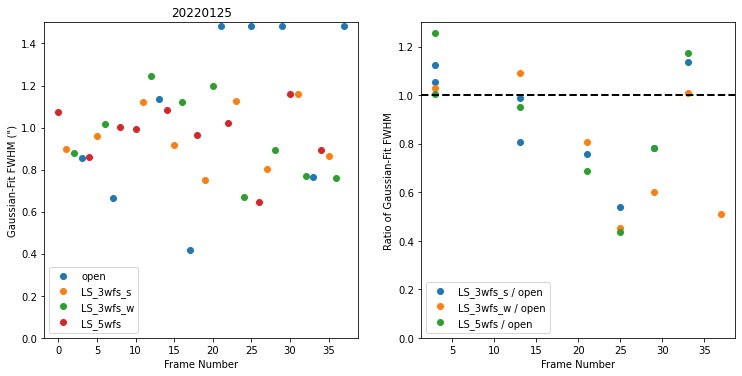

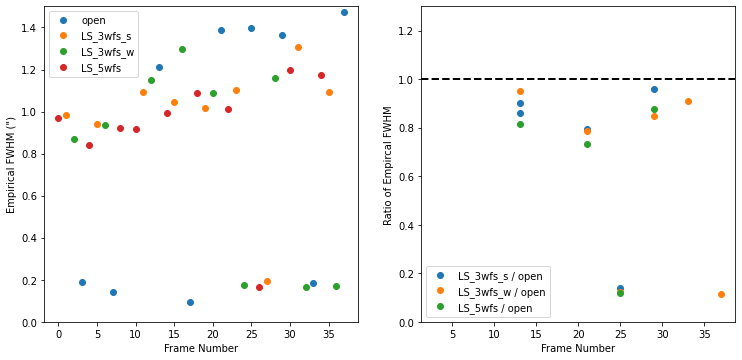

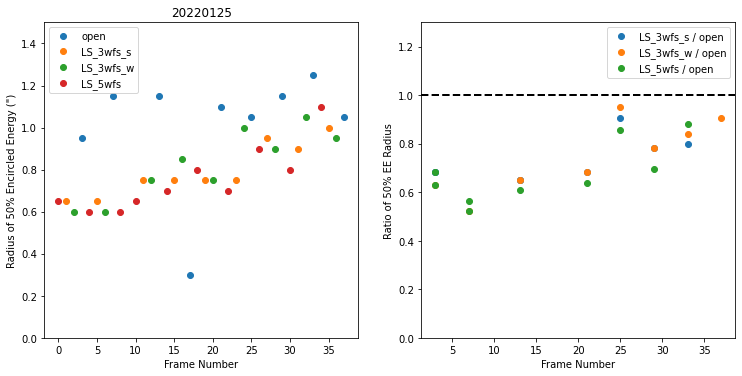

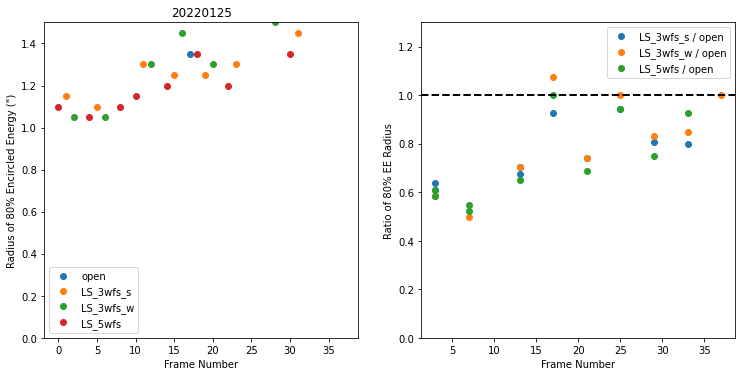

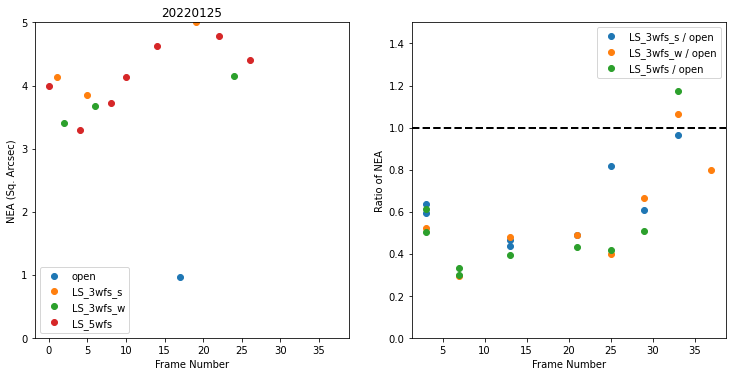

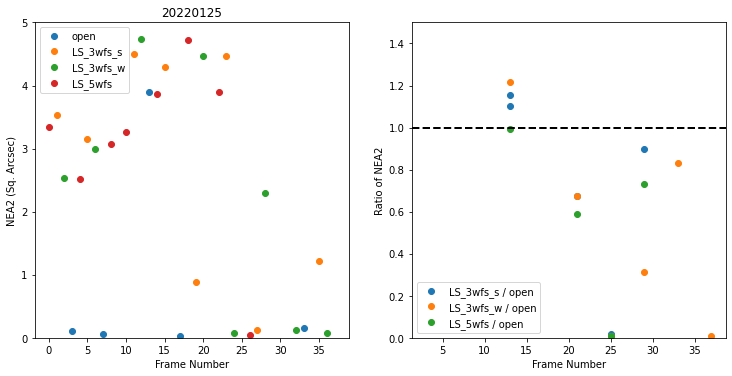

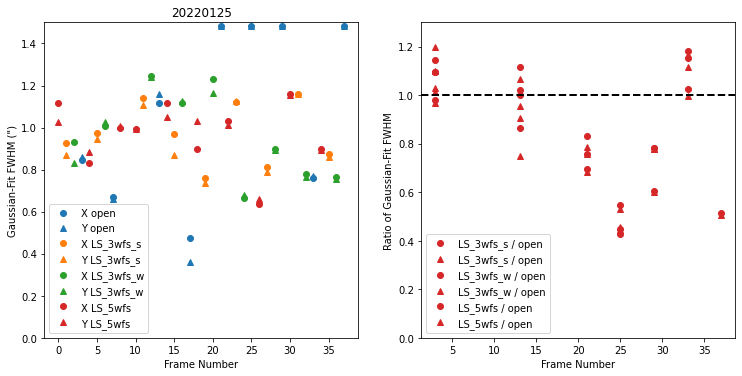

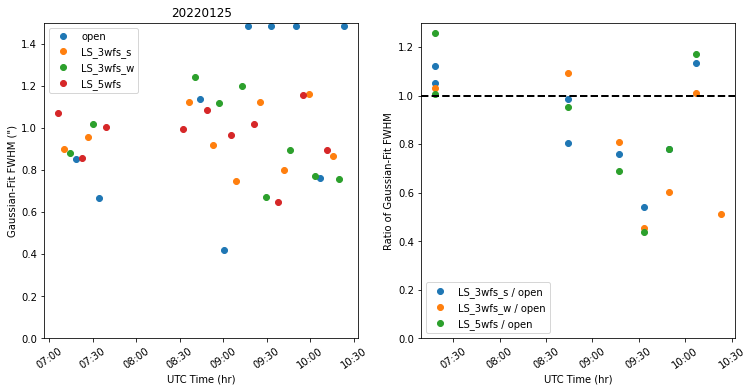

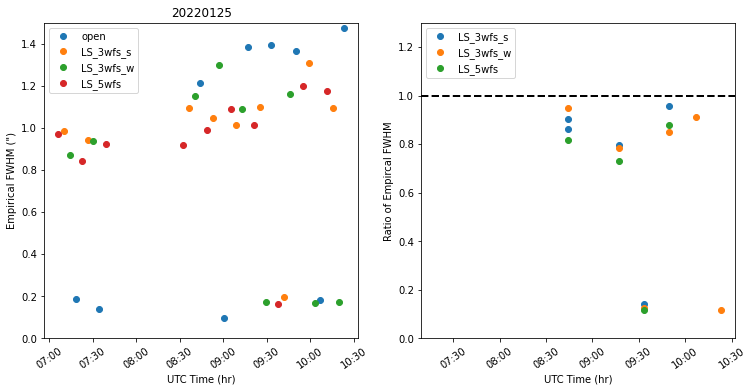

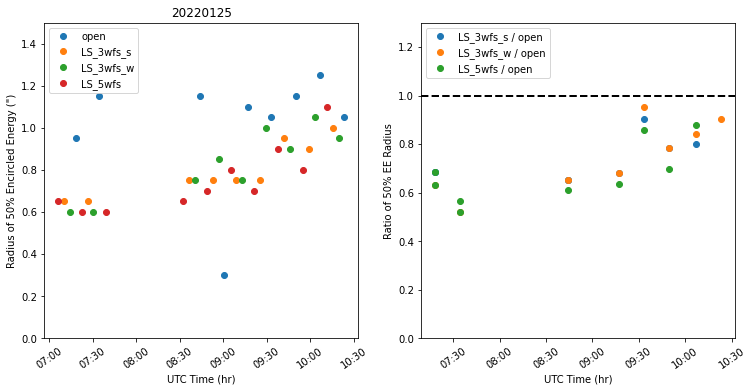

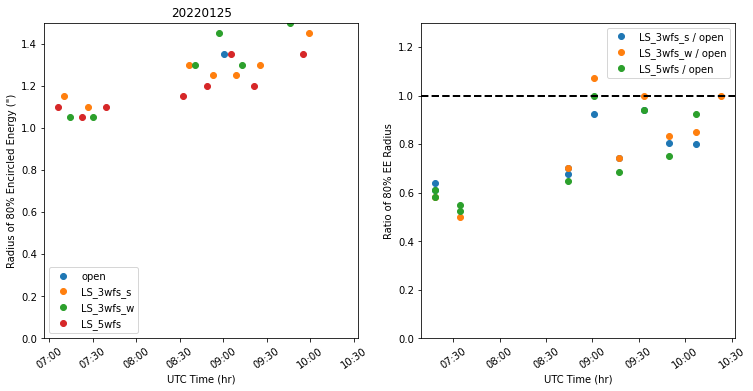

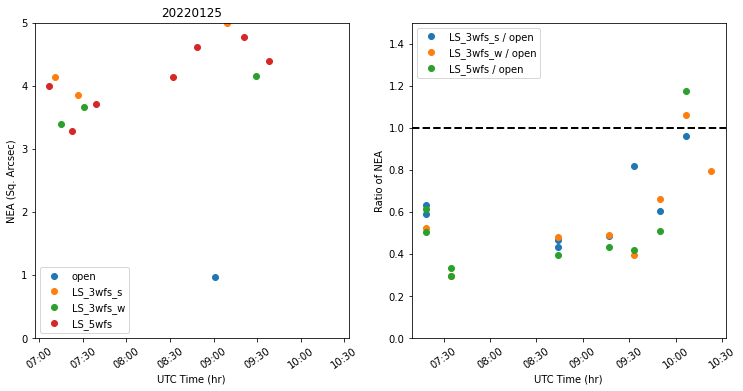

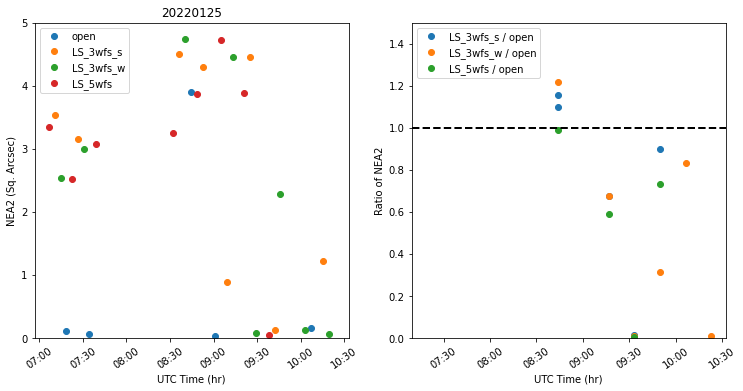

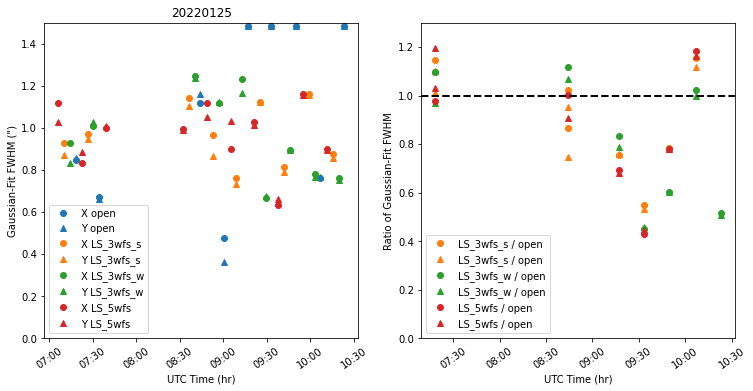

In [48]:
suffixes = ['open', 'LS_3wfs_s', 'LS_3wfs_w', 'LS_5wfs']
plot_stats.plot_stack_stats(night, suffixes=suffixes, root_dir=root_dir + '../../', reduce_dir='sta/reduce/')

# Time Variation w/MASS-DIMM

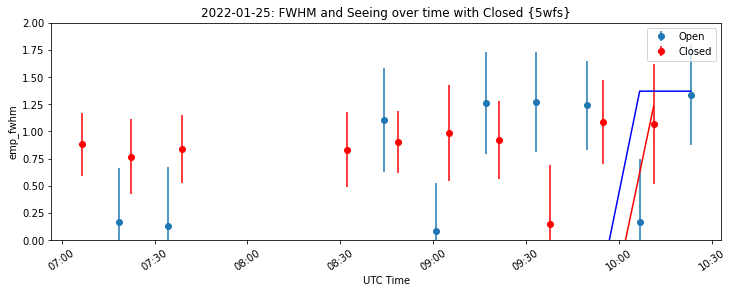

In [49]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_LS_5wfs_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2022-01-25: FWHM and Seeing over time with Closed {5wfs}", plots_dir)

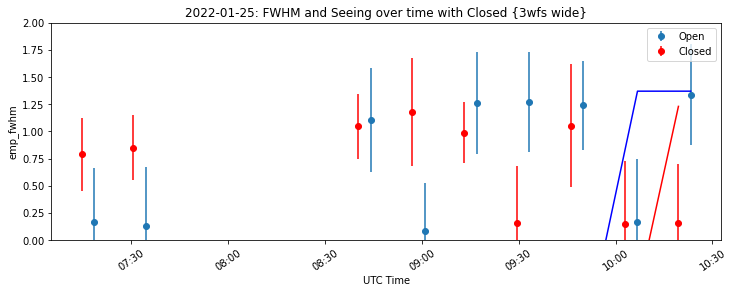

In [50]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_w_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-25: FWHM and Seeing over time with Closed {3wfs wide}", plots_dir)

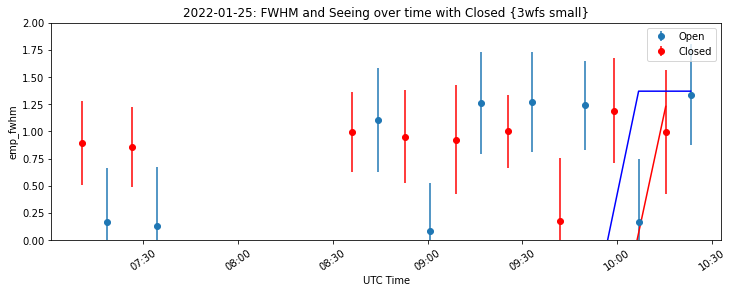

In [51]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_LS_3wfs_s_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2022-01-25: FWHM and Seeing over time with Closed {3wfs small}", plots_dir)

# Aggregate Plots

['/g/lu/data/imaka/onaga/20220125/sta/reduce/stats/stats_open_mdp.fits', '/g/lu/data/imaka/onaga/20220125/sta/reduce/stats/stats_LS_3wfs_s_mdp.fits', '/g/lu/data/imaka/onaga/20220125/sta/reduce/stats/stats_LS_3wfs_w_mdp.fits', '/g/lu/data/imaka/onaga/20220125/sta/reduce/stats/stats_LS_5wfs_mdp.fits']


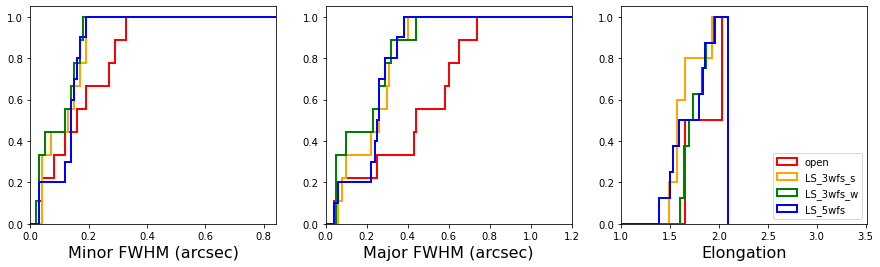

In [54]:
files = [stats_dir + 'stats_' + suffix + '_mdp.fits' for suffix in suffixes]
print(files)
colors = ['red', 'orange', 'green', 'blue', 'lightgreen', 'cyan']
plot_stats.comp_cdf(files, suffixes, colors)

# Field Variability

In [15]:
# Enter chosen file
test_img_base = 'sta009n3wfs_c_scan' # this is the test single code

In [20]:
# pick a file based on key
key = 'open' #'LS_5wfs' # 
i=6

img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

50% EE radius = 0.650"


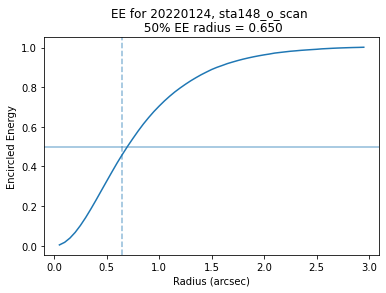

In [21]:
plot_redu.plot_ee_50(test_img_base, root_dir, fld, night)

## Closed loop, single exposure

sta029_o_scan
Median FWHM           = 2.316"
Median FWHM (clipped) = 2.316"
Mean FWHM             = 2.094"
Mean FWHM (clipped)   = 2.094"
Stddev FWHM           = 1.466"
Stddev FWHM (clipped) = 1.466"


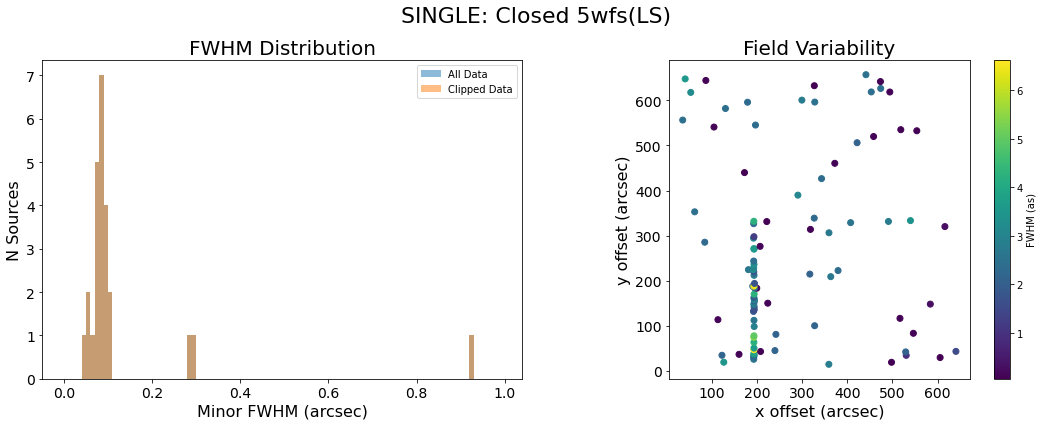

In [53]:
from importlib import reload
reload(plot_stats)
print(test_img_base)
img_file = root_dir + f'reduce/{fld}/{test_img_base}_clean.fits'
starlist = root_dir +  f'reduce/{fld}/{test_img_base}_clean_stars_stats_mdp.fits'
plot_stats.plot_var(img_file, starlist, "SINGLE: Closed 5wfs(LS)")

### Closed loop (3wfs_s)

In [28]:
img_file = stack_dir + 'beehive_stack_n3wfs_s_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wfs_s_c_stars.txt'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_w)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220123/sta/reduce/stacks/beehive_stack_n3wfs_s_c.fits'

### Closed loop (3wfs_w)

In [21]:
img_file = stack_dir + 'beehive_stack_n3wfs_w_c.fits' 
starlist = stack_dir + 'beehive_stack_n3wfs_w_c_stars.txt'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (3wfs_s)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220121/sta/reduce/stacks/beehive_stack_n3wfs_w_c.fits'

### Closed loop (5wfs)

In [22]:
img_file = stack_dir + 'beehive_stack_n5wfs_c.fits'
starlist = stack_dir + 'beehive_stack_n5wfs_c_stars.txt'
plot_stats.plot_var(img_file, starlist, "STACK: Closed (5wfs)")

FileNotFoundError: [Errno 2] No such file or directory: '/g/lu/data/imaka/onaga/20220121/sta/reduce/stacks/beehive_stack_n5wfs_c_stars.txt'